# Walmart Retail Sales Forecasting System

## 1. Objective and Dataset
The objective of this project is to develop a comprehensive retail sales forecasting system for Walmart using historical sales data.

## 2. Import Libraries

In [7]:
from retailer_sales_forecasting_system.data.extract import load_sales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the sales data

df = load_sales()
df.head()

,id,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,created_at
0,1,1,2010-02-05,1643690.90,False,42.31,2.572,211.096358,8.106,2026-01-13 00:47:51.225908
1,2,1,2010-02-12,1641957.44,True,38.51,2.548,211.242170,8.106,2026-01-13 00:47:51.225908
2,3,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,2026-01-13 00:47:51.225908
3,4,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,2026-01-13 00:47:51.225908
4,5,1,2010-03-05,1554806.68,False,46.50,2.625,211.350143,8.106,2026-01-13 00:47:51.225908


## 3. Exploratory Data Analysis (EDA)

In [6]:
print("Walmart Retail Sales Data Analysis")
print("==================================")
print("\n📊 Data Overview")
print("==================================")
df.info()
print("\n Features: ", df.columns.tolist())

Walmart Retail Sales Data Analysis

📊 Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            6435 non-null   int64         
 1   store         6435 non-null   int64         
 2   date          6435 non-null   datetime64[ns]
 3   weekly_sales  6435 non-null   float64       
 4   holiday_flag  6435 non-null   bool          
 5   temperature   6435 non-null   float64       
 6   fuel_price    6435 non-null   float64       
 7   cpi           6435 non-null   float64       
 8   unemployment  6435 non-null   float64       
 9   created_at    6435 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(5), int64(2)
memory usage: 458.9 KB

 Features:  ['id', 'store', 'date', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'created_at']


In [4]:
print("📉 Data Dimensions")
print("=======================================")
print(f"✔️ Number of Records: {df.shape[0]}")
print(f"✔️ Number of Stores: {df['store'].nunique()}")
print(f"✔️ Data Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"✔️ Total Number of Weeks in Data: {df['date'].nunique()}")
print(f"✔️ Records per Store (Average): {df.shape[0] // df['store'].nunique():.1f}")

📉 Data Dimensions
✔️ Number of Records: 6435
✔️ Number of Stores: 45
✔️ Data Range: 2010-02-05 to 2012-10-26
✔️ Total Number of Weeks in Data: 143
✔️ Records per Store (Average): 143.0


In [5]:
# Confirm if any missing values
missing_values = df.isnull().sum()
print("🔍 Missing Values Check:", missing_values[missing_values > 0] if missing_values.any() else "No missing values found.")

🔍 Missing Values Check: No missing values found.


### Observations and Insights

## 4. Correlation and Variance Explanation by External Factors


🔗 Correlation of Features with Weekly Sales:
 ∙ holiday_flag        : +0.0369
 ∙ fuel_price          : +0.0095
 ∙ temperature         : -0.0638
 ∙ cpi                 : -0.0726
 ∙ unemployment        : -0.1062


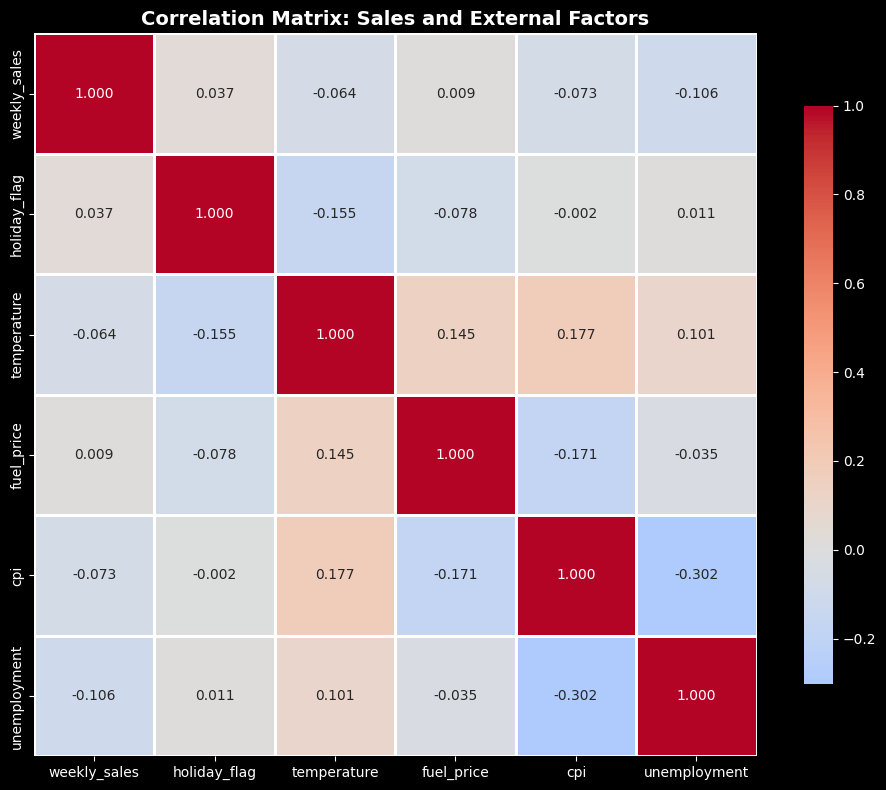

In [10]:
correlation_features = ['weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment']

# Prepare data for correlation analysis
x = df[correlation_features].copy()

# Map boolean 'holiday_flag' to 0/1
if 'holiday_flag' in x.columns:
    x['holiday_flag'] = x['holiday_flag'].astype('Int64')

# Coerce other features to numeric, ignoring errors
for c in x.columns:
    if c != 'holiday_flag':
        x[c] = pd.to_numeric(x[c], errors='coerce')

correlation_df = x.corr()

print("\n🔗 Correlation of Features with Weekly Sales:")
if 'weekly_sales' in correlation_df:
    correlation_with_sales = correlation_df['weekly_sales'].drop('weekly_sales').sort_values(ascending=False)
    for feature, corr_value in correlation_with_sales.items():
        if feature != 'weekly_sales':
            print(f" ∙ {feature:20s}: {corr_value:+.4f}")
    
    # print(
    #     correlation_with_sales.to_frame("corr")
    #     .rename_axis("feature")
    #     .to_string(formatters={"corr": lambda v: f"{v:.4f}"})
    # )
else:
    print("No correlation data available for 'weekly_sales'.")

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.3f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix: Sales and External Factors", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Observations and Insights